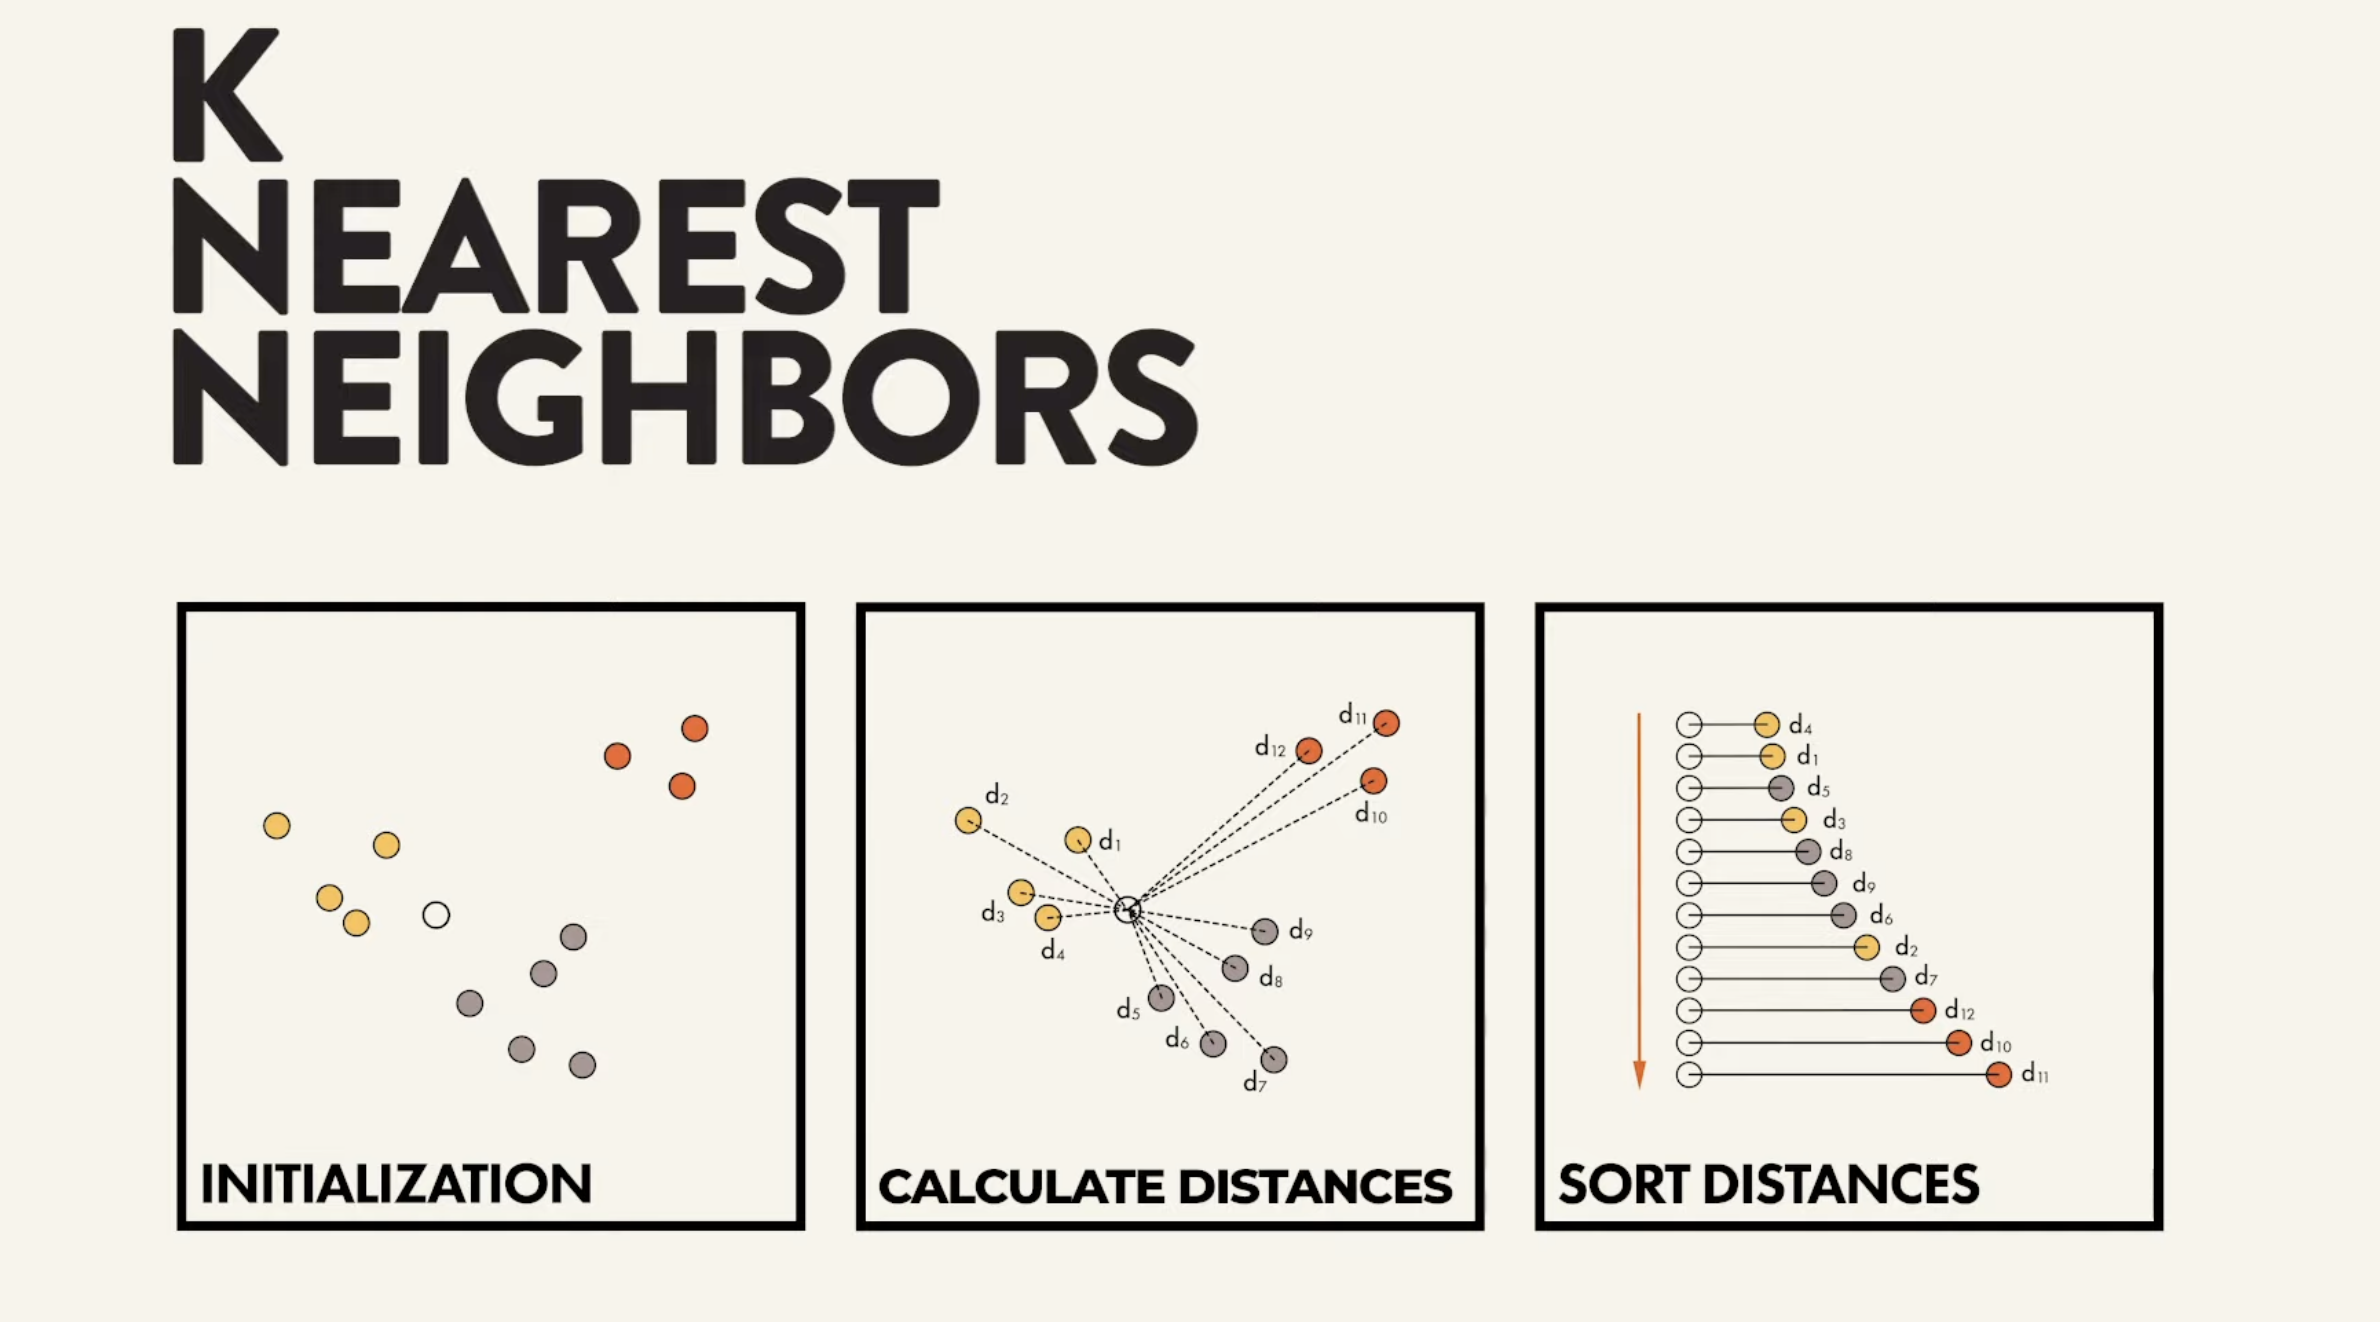

### What is K Nearest Neighbors (KNN)?
- Supervised Algorithm
    - Classification
    - Regression
<br>
<br>
- Makes predictions based on how close a new data point is to known data points.
<br>
<br>
- Lazy Learner: 
    - does no actual training (computations) with the Train data
    - stores the training data
    - computes distance unseen data is from the train data
<br>
<br>
- Works best with smaller samples as opposed to large.
---

# How kNN Works:
![int](https://media.giphy.com/media/JkSouhjLodOMKaPBst/giphy.gif)

![dist](https://media.giphy.com/media/Qf2a09jJOdYHYTnmMI/giphy.gif)

![sort](https://media.giphy.com/media/IbKkSMZev6BOkRdh0r/giphy.gif)

<a href = "https://www.youtube.com/watch?v=0p0o5cmgLdE">YouTube Reference Video</a>

In [1]:
# Quiet my warnings for the sake of the lesson:
import warnings
warnings.filterwarnings("ignore")

# Tabular data friends:
import pandas as pd
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Data acquisition
from pydataset import data

# Acquire (Iris Dataset)

In [2]:
# read Iris data from pydatset
df = data('iris')

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


### In this scenario, the units of measurements within `iris` are consistent. 
Therefore, scaling will not be necessary. (We'll cover this in Regression)

___
# Prepare/Preprocessing

In [5]:
def split_data(df,target):
    '''
    This function will:
    - take in a given DataFrame  
    - stratify on target (formatted as a "string")
    return train, validate, test DataFrames.
    '''
    # 20/80 test/train_validate
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])
    
    # 30/70 validate/train of the 80%
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate[target])
    return train, validate, test


In [6]:
train, validate, test = split_data(df, 'species')

In [7]:
# inspect size
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

In [8]:
# inspect
train.info(), validate.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 80 to 74
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 135 to 125
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  36 non-null     float64
 1   sepal_width   36 non-null     float64
 2   petal_length  36 non-null     float64
 3   petal_width   36 non-null     float64
 4   species       36 non-null     object 
dtypes: float64(4), object(1)
memory usage: 1.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 81 to 66
Data columns (t

(None, None, None)

In [9]:
# create X & y version of train/validate/test
# where X contains the features we want to use and y is a series with just the target variable

X_train = train.drop(columns=['species', 'petal_length', 'petal_width'])
y_train = train.species

X_validate = validate.drop(columns=['species', 'petal_length', 'petal_width'])
y_validate = validate.species

X_test = test.drop(columns=['species', 'petal_length', 'petal_width'])
y_test = test.species

In [10]:
#Compare df columns

print(f"""train:
{train.columns.to_list()} 
_____________________________________________
X_train:
{X_train.columns.to_list()}
_____________________________________________
X_validate:
{X_validate.columns.to_list()}
""")

train:
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'] 
_____________________________________________
X_train:
['sepal_length', 'sepal_width']
_____________________________________________
X_validate:
['sepal_length', 'sepal_width']



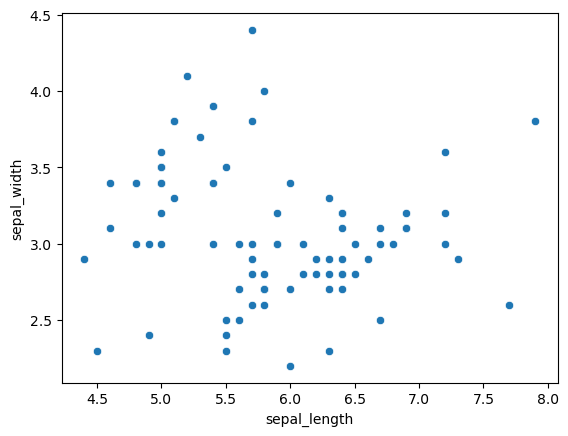

In [12]:
# Visualize training data
sns.scatterplot(data=X_train, x="sepal_length", y="sepal_width");

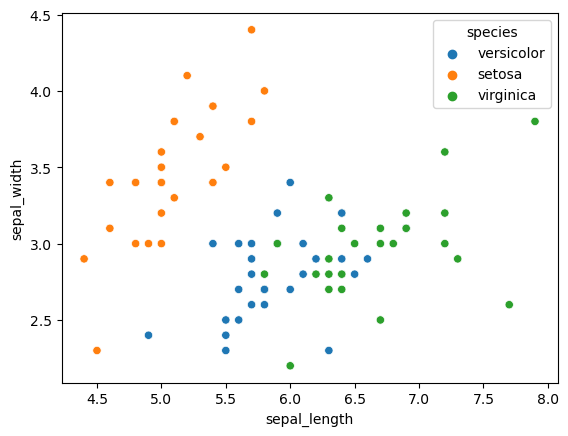

In [13]:
# With color distinction
sns.scatterplot(data=train, x="sepal_length", y="sepal_width", hue="species");

___
# Train Model
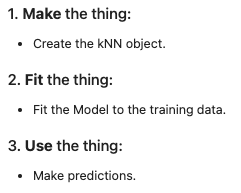


### 1. **Make** the thing: 
- Create the kNN object.
    
<a href = "https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">sklearn kNN Documentation</a>

**Defaults**:
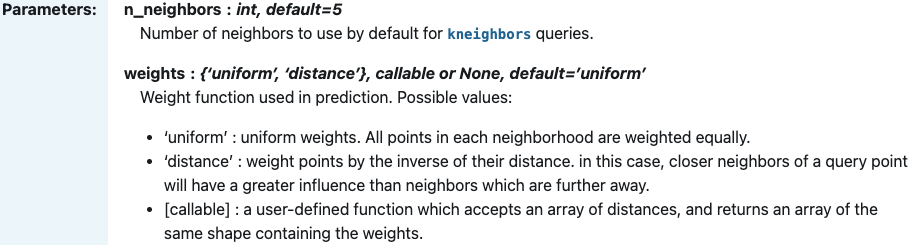

In [14]:
# set to defaults
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

### 2. **Fit** the thing: 
- Fit the Model to the training data.

In [15]:
knn5.fit(X_train, y_train)

KNeighborsClassifier()

### 3. **Use** the thing: 
- Make predictions.

In [16]:
y_pred5 = knn5.predict(X_train)

In [18]:
#sneakpeek
y_pred5[:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

### Estimate Probability

In [19]:
y_pred_proba5 = knn5.predict_proba(X_train)

In [20]:
y_pred_proba5[:5]

array([[0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ]])

In [21]:
# the model object's classes_ property 
# is the most dependable way to get the order of predict_proba labels.
knn5.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
y_pred5[:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

___
# Evaluate Model

## Compute the Accuracy

In [23]:
#conf matrix

confusion_matrix(y_train, y_pred5) #rows, columns

array([[28,  0,  0],
       [ 0, 22,  6],
       [ 0,  4, 24]])

In [24]:
pd.crosstab(y_train, y_pred5) #R:actual, C:predictions

col_0,setosa,versicolor,virginica
species,,,
setosa,28,0,0
versicolor,0,22,6
virginica,0,4,24


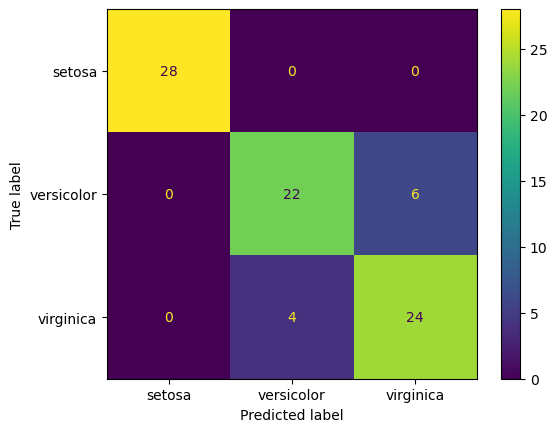

In [26]:
plot_confusion_matrix(knn5, X_train, y_train)

## Create a Classification Report

In [27]:
print(classification_report(y_train, y_pred5))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.85      0.79      0.81        28
   virginica       0.80      0.86      0.83        28

    accuracy                           0.88        84
   macro avg       0.88      0.88      0.88        84
weighted avg       0.88      0.88      0.88        84



## Lets Do it Again

In [29]:
# MAKE THE THING: Create KNN Object
knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform')

# FIT THE THING: Fit object to training data
knn1.fit(X_train, y_train)

# USE  THE THING: Make predictions on training data
y_pred1 = knn1.predict(X_train)


In [30]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.93      0.93      0.93        28
   virginica       0.93      0.93      0.93        28

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84



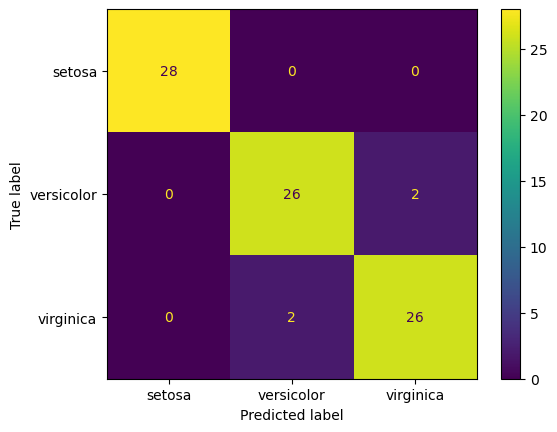

In [31]:
plot_confusion_matrix(knn1, X_train, y_train)

<div class="alert alert-warning" role="alert">
It seems like our `knn1` model is better than our `knn5` model. 
    
- But let's see how they perform on out-of-sample data: VALIDATE
</div>

In [32]:
print(f"""Accuracy of KNN (k=1) classifier on validate set: {knn1.score(X_validate, y_validate):.2f}
     
Accuracy of KNN (k=5) classifier on validate set: {knn5.score(X_validate, y_validate):.2f}""")


Accuracy of KNN (k=1) classifier on validate set: 0.81
     
Accuracy of KNN (k=5) classifier on validate set: 0.83


# Finding the Best value for k

In [34]:
#iteration

model_accuracies = {}

for i in range(1,10):
    #MAKE THE THING
    knn = KNeighborsClassifier(n_neighbors=i)
    
    #FIT THE THING
    knn.fit(X_train, y_train)
    
    #USE THE THING
    model_accuracies[f'{i}_neighbors'] = {
        'train_score': round(knn.score(X_train, y_train),2),
        'validate_score':round(knn.score(X_validate, y_validate),2)
    }

In [35]:
model_accuracies

{'1_neighbors': {'train_score': 0.95, 'validate_score': 0.81},
 '2_neighbors': {'train_score': 0.89, 'validate_score': 0.78},
 '3_neighbors': {'train_score': 0.87, 'validate_score': 0.81},
 '4_neighbors': {'train_score': 0.82, 'validate_score': 0.75},
 '5_neighbors': {'train_score': 0.88, 'validate_score': 0.83},
 '6_neighbors': {'train_score': 0.88, 'validate_score': 0.75},
 '7_neighbors': {'train_score': 0.87, 'validate_score': 0.75},
 '8_neighbors': {'train_score': 0.86, 'validate_score': 0.75},
 '9_neighbors': {'train_score': 0.86, 'validate_score': 0.78}}

In [37]:
pd.DataFrame(model_accuracies).T

,train_score,validate_score
1_neighbors,0.95,0.81
2_neighbors,0.89,0.78
3_neighbors,0.87,0.81
4_neighbors,0.82,0.75
5_neighbors,0.88,0.83
6_neighbors,0.88,0.75
7_neighbors,0.87,0.75
8_neighbors,0.86,0.75
9_neighbors,0.86,0.78


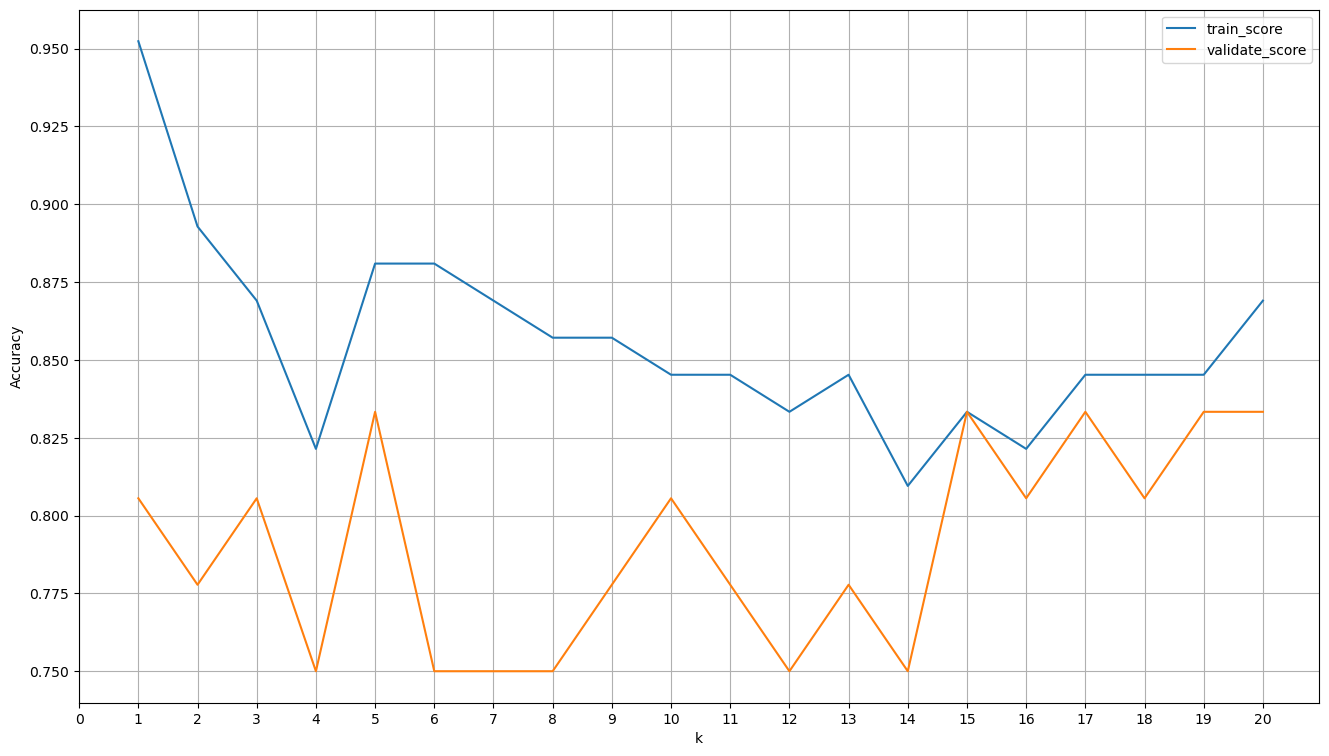

In [38]:
#VIZ

metrics = []

for k in range(1,21):
    
    # MAKE the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # FIT the thing (remember only fit on training data)
    knn.fit(X_train, y_train)
    
    # USE the thing (calculate accuracy)
    train_score = knn.score(X_train, y_train)
    validate_score = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_score": train_score,
        "validate_score": validate_score
    }
    
    metrics.append(output)
    
#conver to df
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [39]:
results

,k,train_score,validate_score
0,1,0.952381,0.805556
1,2,0.892857,0.777778
2,3,0.869048,0.805556
3,4,0.821429,0.750000
4,5,0.880952,0.833333
5,6,0.880952,0.750000
6,7,0.869048,0.750000
7,8,0.857143,0.750000
8,9,0.857143,0.777778
9,10,0.845238,0.805556


# Next Steps
- We only used `sepal_length` and `sepal_width`. We can try new models with different and/or additional features. 


There are other hyperparameters we can tweak:

- `weights`: Uniform is the default (all points are treated equally), but we can switch to a 'distance' approach where nearer neighbors are given more weight in the voting process
- `algorithm`: Large datasets use a sampling algorithm to save on computational cost. We can try different samplers. 
- `metric`: There is more than one way to measure distance

